# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [11]:
# Your code to create a clustering solution

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(data)

pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

features_2d


array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       ...,
       [-0.13072154,  0.0767816 ],
       [ 0.43722666, -0.02364599],
       [-0.21179279,  0.02825676]])

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

km_clusters = model.fit_predict(data.values)

km_clusters

array([2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1,

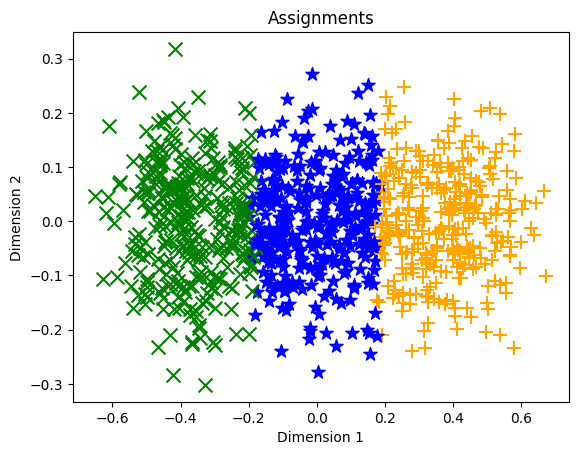

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [15]:
plot_clusters(features_2d, data.values)

TypeError: unhashable type: 'numpy.ndarray'

Bad pipe message: %s [b'D|\xf2\xd0\x81iA6~\x13\t\xa9~\x88\x13\xcd\xec\x1f \xc2\xe6']
Bad pipe message: %s [b'\xe0\xb8\xbf~N\xe2\xc5\xe0\xd6V\xd1\x95\x03\x82\x8d\x1c"\xd6 \x80\x1fXb,,\xba\xba\x9a\x9aDc\xaa\x03"x\xa0\x07\x97\xd0\xc9\x90~H\x12\xd3\xaf\x83\x8c\xad}\x9d\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04']
Bad pipe message: %s [b"\x8f\xe3G\x10\xed\xa2\xacd\xd6\xb59\x8a$w\x13\x93\xb8[\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\